# Drawback

In [1]:
import pandas as pd

In [35]:
import risk_kt as rk
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
me_m = pd.read_csv("data_set/Portfolios_Formed_on_ME_monthly_EW.csv", na_values= 99.99,
                  index_col = 0, parse_dates = True)

In [5]:
me_m.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,-99.99,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,-99.99,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,-99.99,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,-99.99,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,-99.99,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [6]:
rets = me_m[["Lo 10", "Hi 10"]]

In [7]:
rets.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


In [8]:
rets.columns = ["small_cap", "large_cap"]

In [9]:
rets = rets/100

In [10]:
rets.plot.line()

In [11]:
rets.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [12]:
rets.index = pd.to_datetime(rets.index, format = "%Y%m")

In [13]:
rets.index = rets.index.to_period("M")

In [14]:
rets.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110, freq='M')

In [15]:
rets.plot.line()

In [16]:
rets["1975"]

,small_cap,large_cap
1975-01,0.3202,0.1286
1975-02,0.0657,0.0613
1975-03,0.0989,0.0414
1975-04,0.0288,0.0531
1975-05,0.0811,0.0610
1975-06,0.0779,0.0524
1975-07,0.0218,-0.0703
1975-08,-0.0525,-0.0177
1975-09,-0.0351,-0.0468
1975-10,-0.0009,0.0620


In [17]:
rets.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110, freq='M')

In [18]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-07 to 2018-12
Freq: M
Data columns (total 2 columns):
small_cap    1110 non-null float64
large_cap    1110 non-null float64
dtypes: float64(2)
memory usage: 26.0 KB


# Compute drawdown

1. Compute a wealth index
2. compute previous peaks
3. compute drawdown- which is the walth value as percentage of previous peaks

In [19]:
wealth_index = 1000*(1+rets["large_cap"]).cumprod()

In [20]:
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: large_cap, dtype: float64

In [21]:
wealth_index.plot.line()

In [22]:
previous_peaks = wealth_index.cummax()

In [23]:
previous_peaks.plot.line()

In [24]:
drawdown = (wealth_index-previous_peaks)/previous_peaks

In [25]:
drawdown.plot()

In [26]:
drawdown.head()

1926-07    0.0000
1926-08    0.0000
1926-09    0.0000
1926-10   -0.0243
1926-11    0.0000
Freq: M, Name: large_cap, dtype: float64

In [27]:
drawdown.min()

-0.84003752779431229

In [28]:
# maximum drawdown since 1975
print( drawdown["1975":].idxmin(), drawdown[drawdown["1975":].idxmin()])

2009-02 -0.528094504231


In [29]:
import pandas as pd

def drawdown(return_series:pd.Series):
    """
    Takes a time series of asset returns
    computes and return a DataFrame that contains:
        wealth_index
        previous_peaks
        percent_drawdown
    """
    wealth_index = 1000*(1+ return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    
    return pd.DataFrame({
        "wealth":wealth_index,
        "peaks":previous_peaks,
        "drawdown":drawdowns
    })

In [30]:
large_cap_drawdown = drawdown(rets["large_cap"])

In [31]:
large_cap_drawdown[["wealth", "peaks"]].plot()

In [32]:
small_cap_drawdown = drawdown(rets["small_cap"])
small_cap_drawdown[["wealth", "peaks"]].plot()

,small_cap,large_cap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


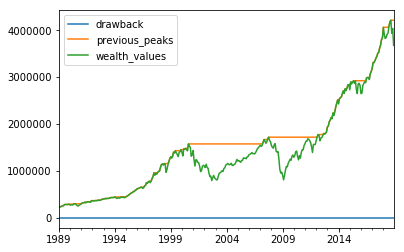

In [41]:
rk.drawback(rets["large_cap"])["1989":].plot()
rets.head()